### Task 1: Exploratory Data Analysis (EDA):

In [2]:
# importing neceassary libraries and load the dataset

import pandas as pd
df=pd.read_csv(r"C:\Users\khanu\Documents\classexcelr\assignment downloads\PCA\wine.csv")
df.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [8]:
df.shape

(178, 14)

In [10]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [12]:
# checking for null values

df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

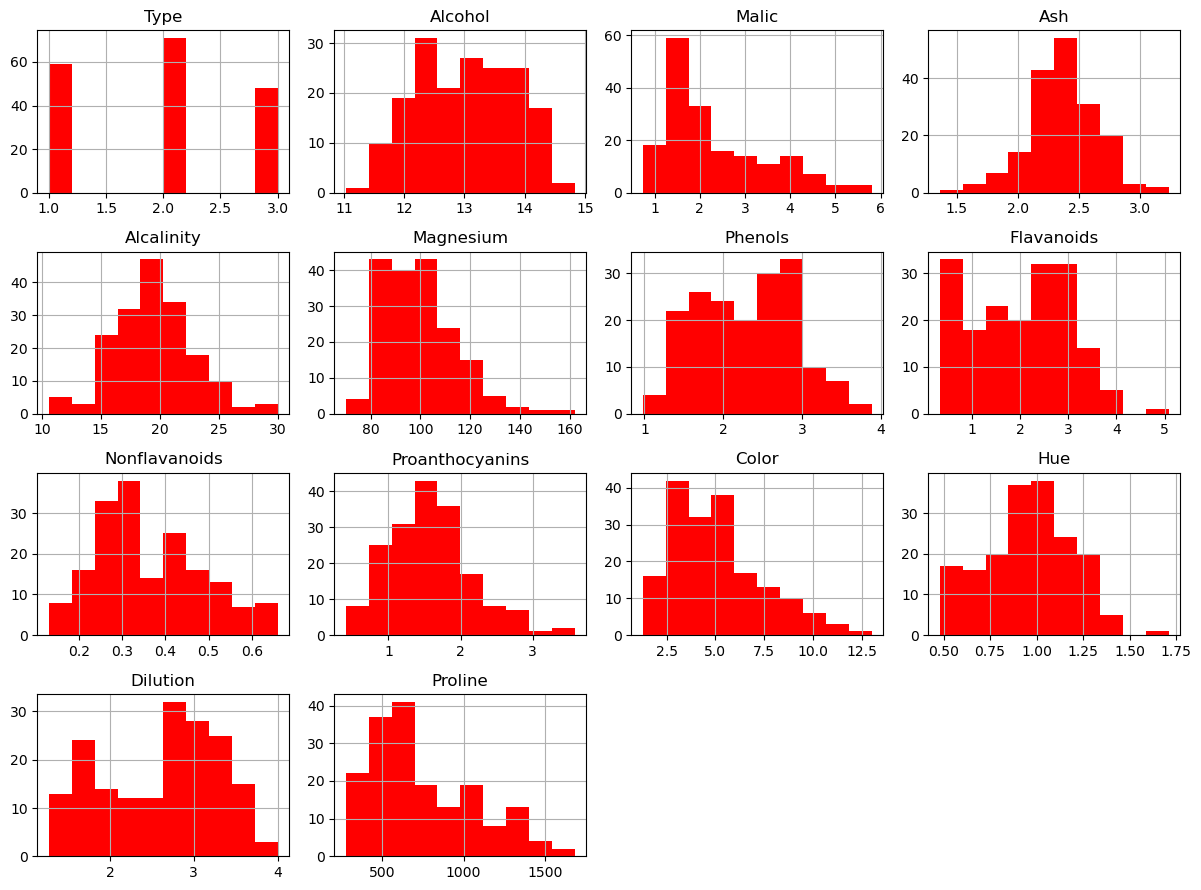

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12,9),color='Red')
plt.tight_layout()
plt.show()

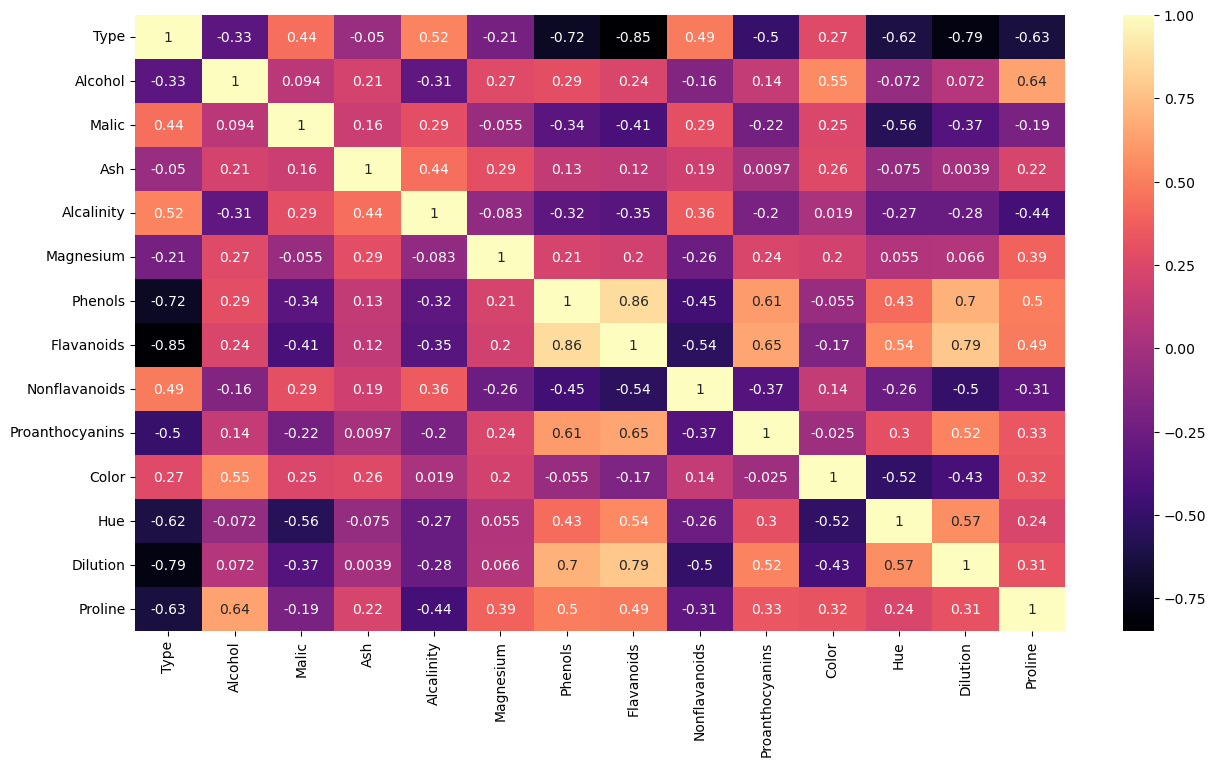

In [28]:
# plotting heatmap to chck for correlation between the paramters
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='magma')
plt.show()

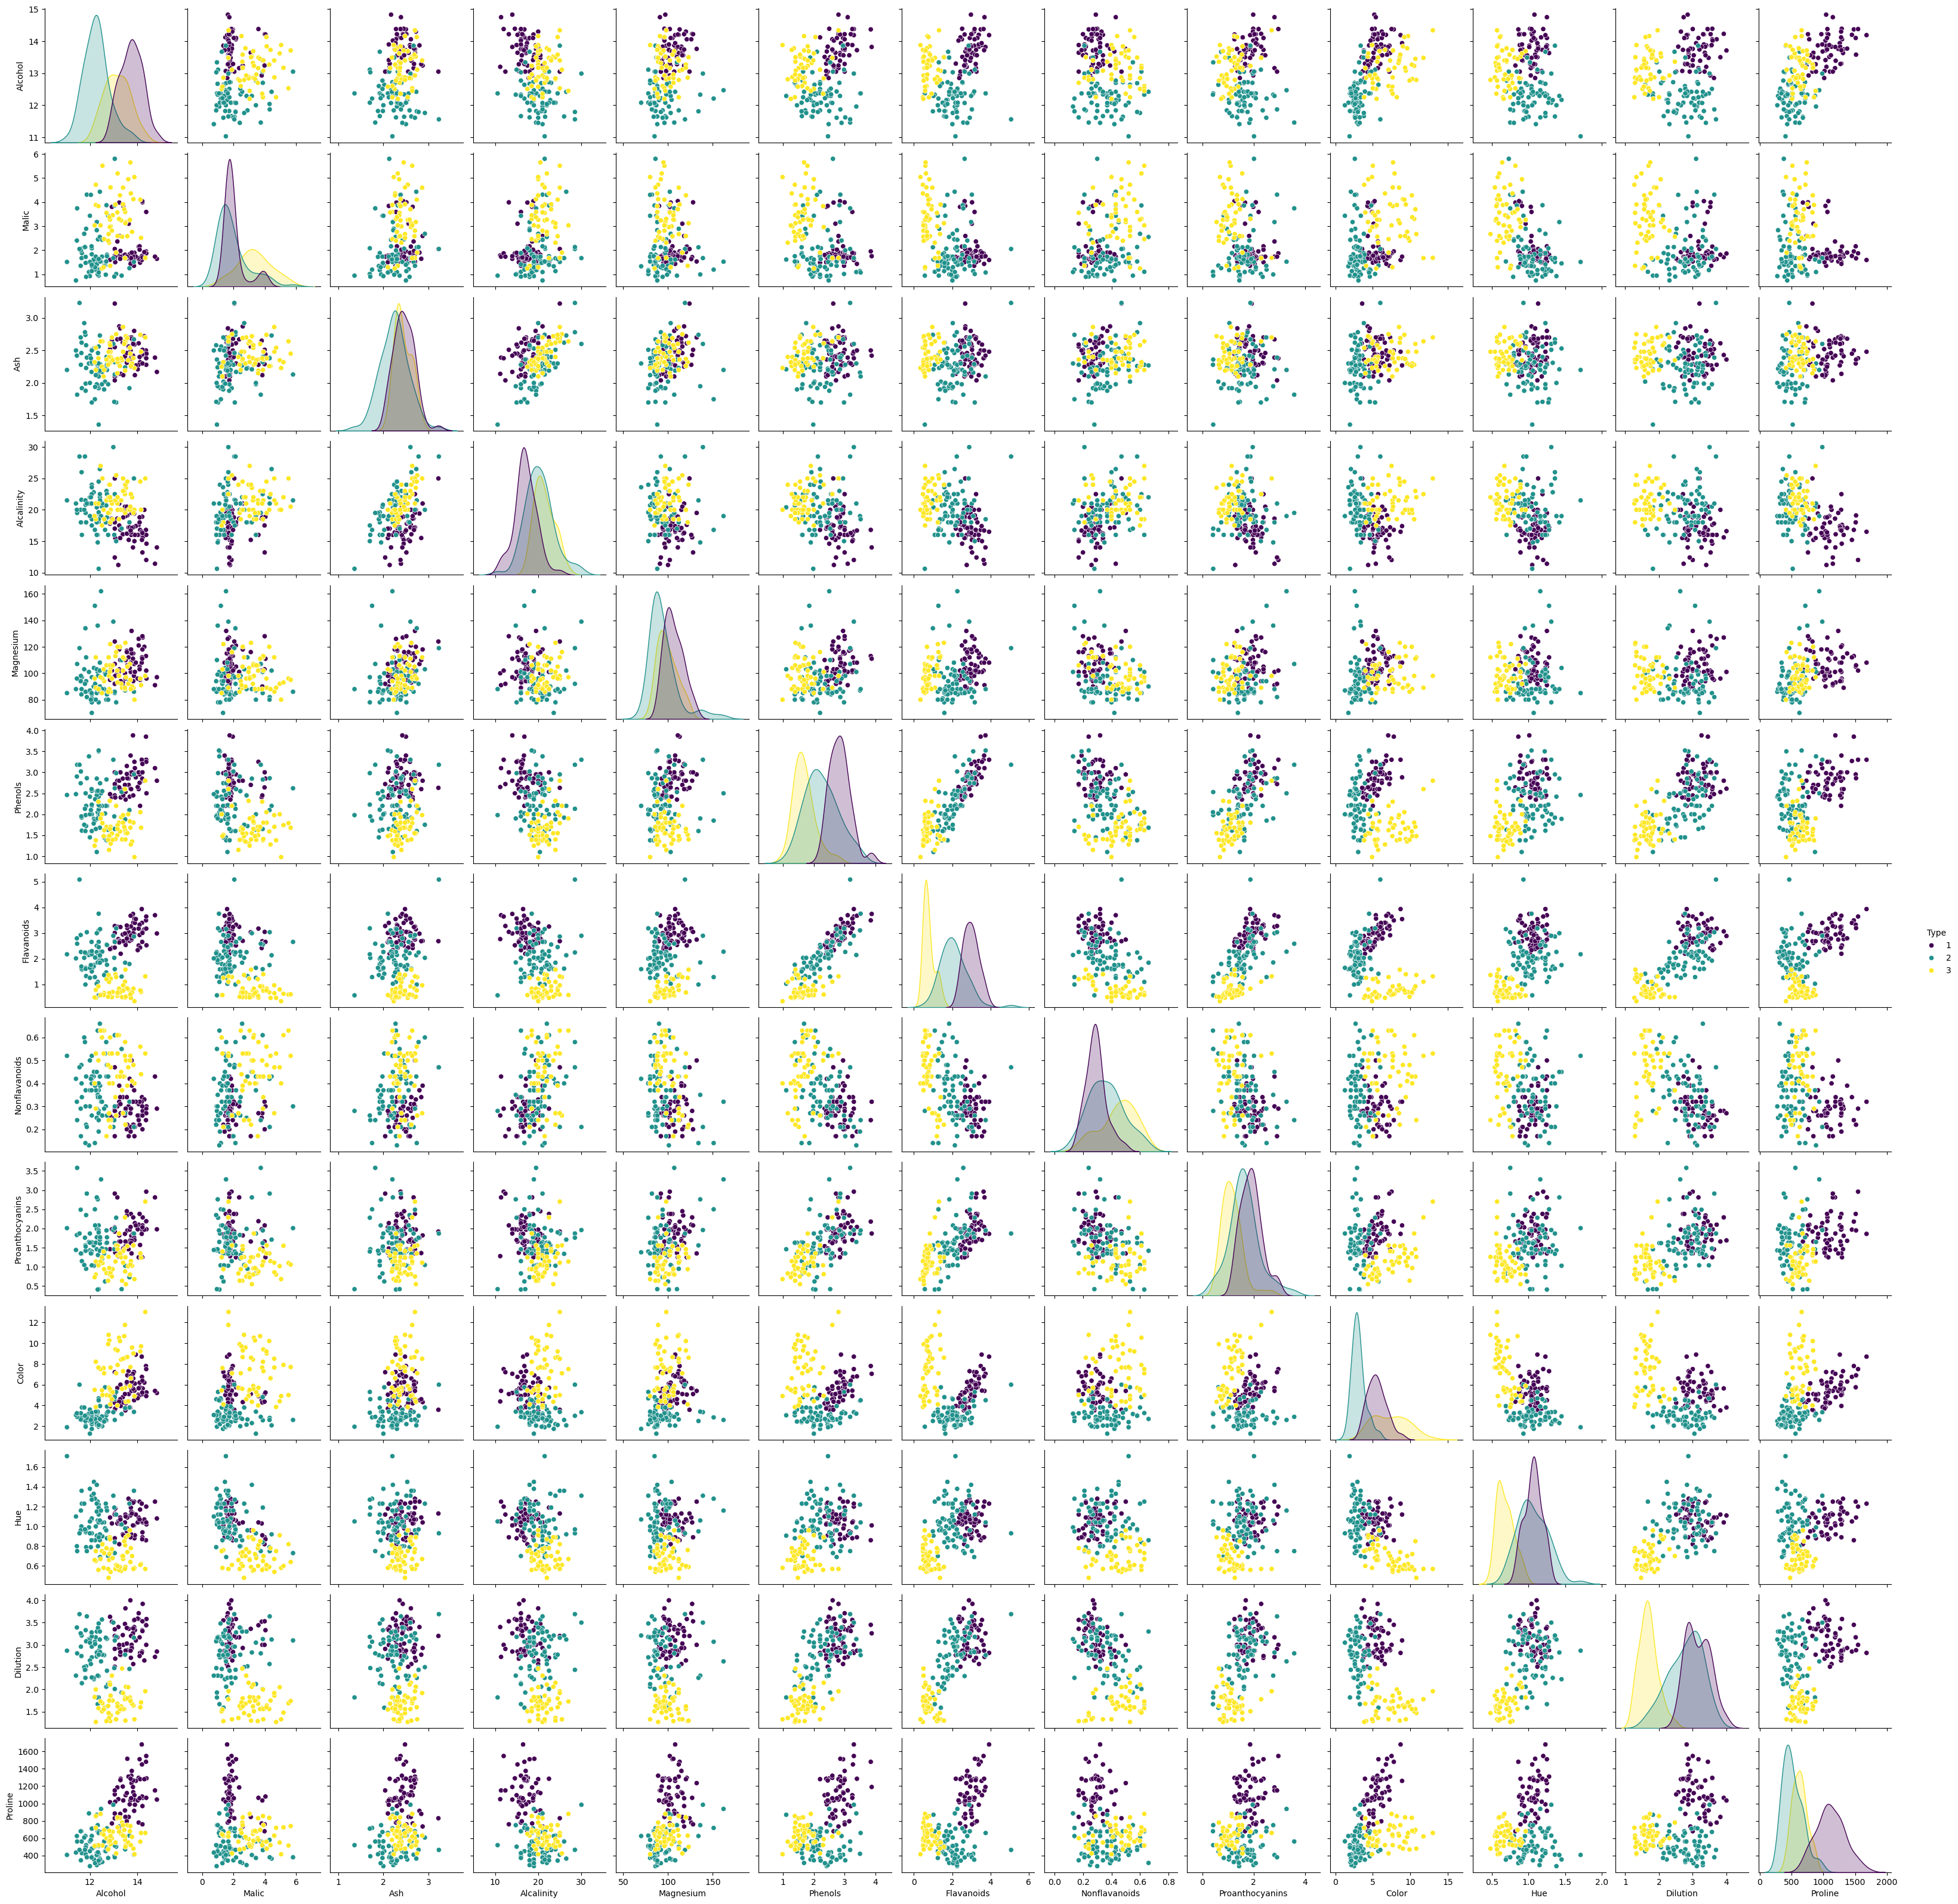

In [30]:
sns.pairplot(df,palette='viridis',hue='Type')
plt.show()

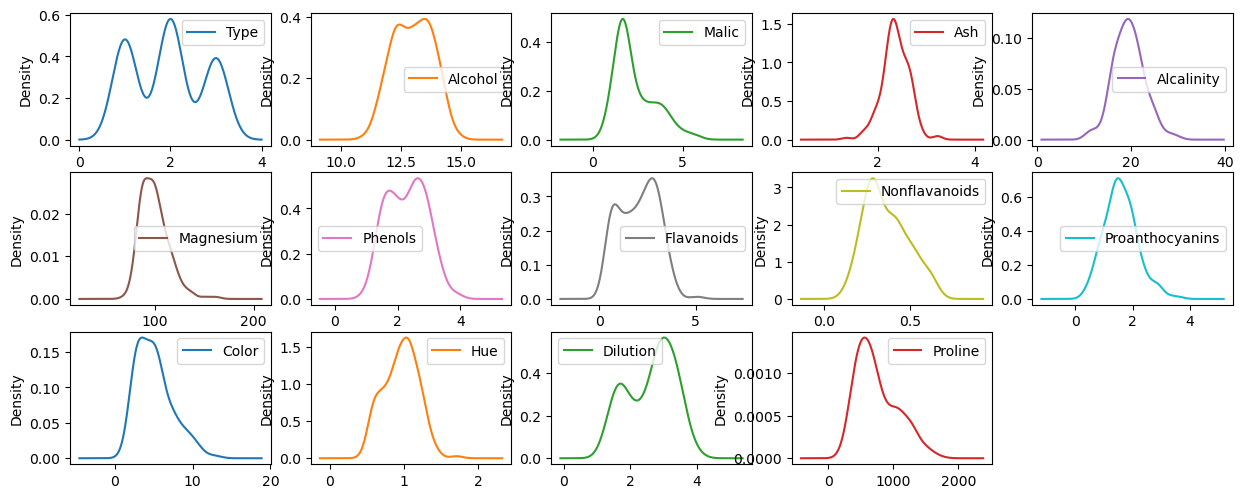

In [44]:
df.plot(kind='density',figsize=(15,10),subplots=True,layout=(5,5),sharex=False)
plt.show()

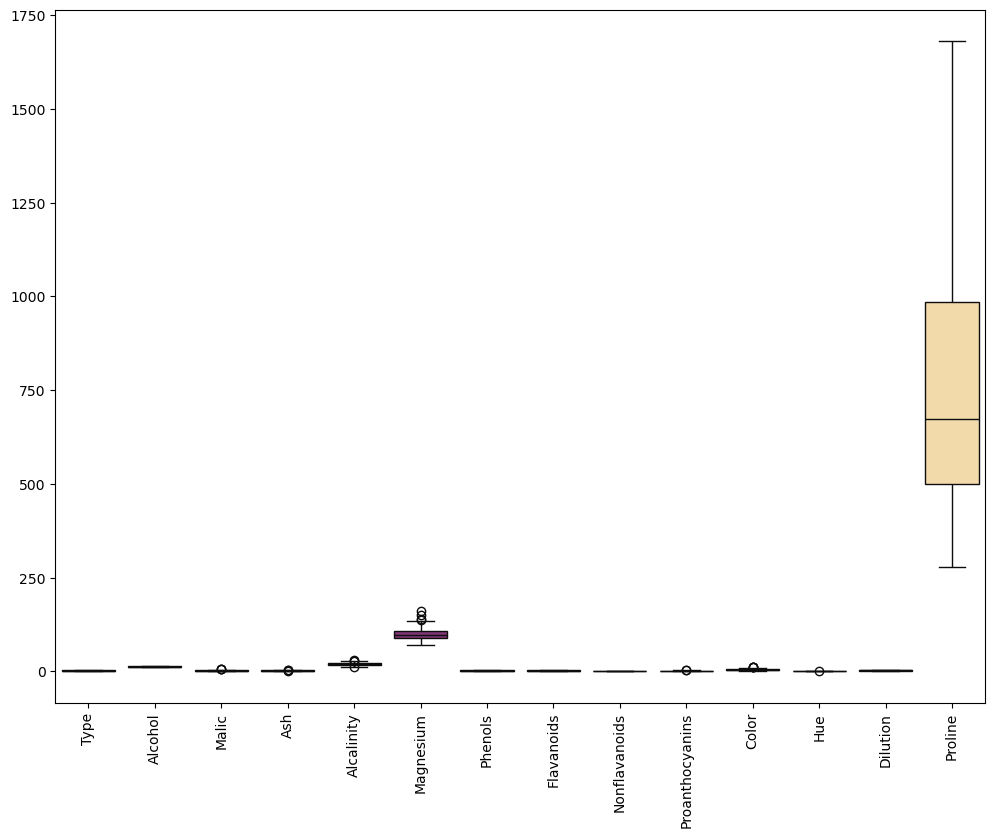

In [34]:
# boxplot for outlier detection

plt.figure(figsize=(12,9))
sns.boxplot(df,palette='magma')
plt.xticks(rotation=90)
plt.show()

In [49]:
import numpy as np
# detecting the outliers using IQR method
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)

IQR= Q3 - Q1
lower=Q1 - 1.5 * IQR
upper=Q3 + 1.5 * IQR
outliers=((df<lower)| (df> upper))
outliers.sum()

Type               0
Alcohol            0
Malic              3
Ash                3
Alcalinity         4
Magnesium          4
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    2
Color              4
Hue                1
Dilution           0
Proline            0
dtype: int64

In [51]:
# Treating outliers

# Removing rows with outliers
df = df[~((df < lower) | (df > upper)).any(axis=1)]

df.shape

(161, 14)

### Task 2: Dimensionality Reduction with PCA:

In [55]:
# Standardizing the features 

from sklearn.preprocessing import StandardScaler

scaled= StandardScaler()
scaled_data= scaled.fit_transform(df)

In [59]:
# Implementing PCA to reduce the dimensionality of the dataset.

from sklearn.decomposition import PCA

# applying PCA
pca=PCA()
wine_pca=pca.fit_transform(scaled_data)

# explained variance ratio
explained_variance= pca.explained_variance_ratio_
cummulative_var= explained_variance.cumsum()

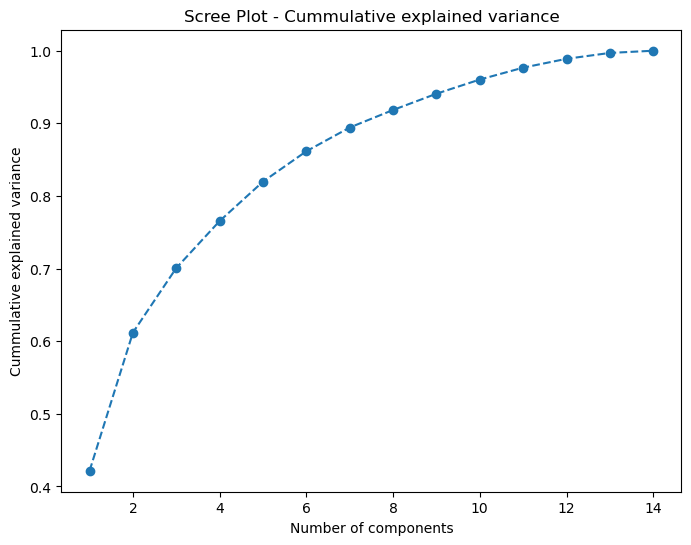

In [61]:
# plottig scree plot

plt.figure(figsize=(8,6))
plt.plot(range(1,len(cummulative_var)+1),cummulative_var,marker='o',linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cummulative explained variance')
plt.title('Scree Plot - Cummulative explained variance')
plt.show()

In [63]:
optimal_comp=5
pca=PCA(n_components=optimal_comp)
wine_pca_transformed=pca.fit_transform(scaled_data)

### Task 3: Clustering with Original Data

In [83]:
# Applying K-Means Clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# applying kmeans on the original data

kmeans=KMeans(n_clusters=3,random_state=42)
clusters= kmeans.fit_predict(scaled_data)

C:\Users\khanu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [85]:
# evaluating using silhouette score

silhouette= silhouette_score(scaled_data,clusters)
print(f'Silhouette Score = {silhouette}')

Silhouette Score = 0.3215622104770535


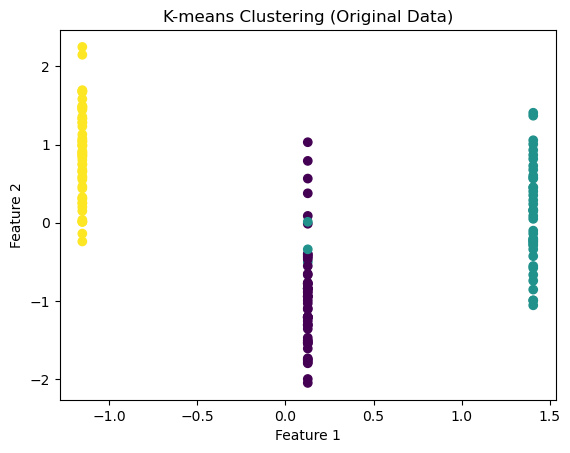

In [87]:
# visualize the kmeans(original data)

plt.scatter(scaled_data[:,0],scaled_data[:,1],c=clusters, cmap='viridis')
plt.title('K-means Clustering (Original Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Task 4: Clustering with PCA Data

In [89]:
# applying kmeans on the transformed data

kmeans=KMeans(n_clusters=3,random_state=42)
clusters_tr= kmeans.fit_predict(wine_pca_transformed)

# evaluating using silhouette score

silhouette= silhouette_score(wine_pca_transformed,clusters_tr)
print(f'Silhouette Score = {silhouette}')

Silhouette Score = 0.41262408452450267


C:\Users\khanu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


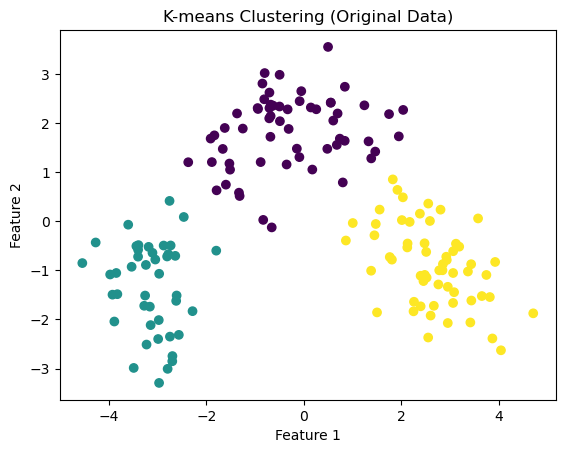

In [91]:
# visualize the kmeans( transformed data)

plt.scatter(wine_pca_transformed[:,0],wine_pca_transformed[:,1],c=clusters_tr, cmap='viridis')
plt.title('K-means Clustering (Original Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Task 5: Comparison and Analysis:
1. **Silhouette Scores:**
The silhouette score improved from 0.321 for the original dataset to 0.413 for the PCA-transformed dataset. A higher silhouette score indicates better-defined and more compact clusters, meaning that PCA has helped improve the clustering quality.

2. **Cluster Shapes:**
In the original data, clusters appear as three straight lines, which might indicate that the data is not well-separated in the original high-dimensional feature space. After applying PCA, the clusters are well-separated and visually distinct, suggesting that dimensionality reduction has successfully isolated key patterns in the data.

3. **Cluster Quality:**
The clusters formed in the PCA-transformed data show better separation, which can be observed both visually and through the improved silhouette score. This indicates that the PCA transformation has captured the most relevant variations in the data, leading to better-defined clusters.

**Similarities and Differences in the Clustering Results**

* Similarities:
  1. Both the original data and PCA-transformed data have identified three clusters, indicating that the underlying structure of the data remains consistent across both cases.
  2. The general composition of clusters seems to be the same, with data points assigned to similar clusters across both datasets, though with varying degrees of separation.

* Differences:
  1. Cluster Shape: In the original data, the clusters are aligned along straight lines, suggesting that some features might be contributing noise or that the high-dimensional space is not well-suited for clustering. After PCA, the clusters take on more natural and well-defined shapes, reflecting the importance of dimensionality reduction in clarifying the data.
  2. Separation of Clusters: In the PCA-transformed data, the clusters are much more distinct, showing that PCA successfully reduced irrelevant noise and highlighted key features that contribute to clustering.

**Impact of Dimensionality Reduction on Clustering Performance**
* Improved Cluster Separation: After applying PCA, the silhouette score improved from 0.3216 to 0.4126, showing that the clusters became more defined and less overlapped in the lower-dimensional space. This suggests that PCA helped eliminate noise and irrelevant features, which can negatively affect clustering algorithms.

* Simplification of Data Structure: PCA transforms the dataset into principal components, which capture the most significant variance in the data. This simplification makes it easier for clustering algorithms to detect patterns and form clusters because the important information is now concentrated in fewer dimensions.

* Noise Reduction: PCA removes irrelevant or redundant features, leading to improved clustering performance by minimizing the effect of noise that could distort the clusters.

**Trade-offs Between Using PCA and Clustering Directly on the Original Dataset**

Advantages of Using PCA:

* Dimensionality Reduction: Reduces computational complexity, especially for large datasets with many features.
* Better Cluster Formation: As seen in this case, PCA can enhance cluster separation by focusing on the key components of variance in the data.
* Handling Redundancy: PCA eliminates redundant features that may have similar information, improving the clustering algorithm's performance.

Drawbacks of Using PCA:

* Loss of Interpretability: After applying PCA, the new principal components are linear combinations of the original features, making it harder to interpret what each component represents in real-world terms.
* Risk of Over-Simplification: If too few components are retained, some important information might be lost, potentially affecting the quality of clustering in some cases.
* Non-linear Relationships: PCA assumes that the relationships between features are linear. If there are non-linear relationships, PCA may not capture the complexity of the data, leading to suboptimal results.

Advantages of Clustering on Original Data:

* Interpretability: Clustering on the original data preserves the real-world meaning of the features, making the clusters more interpretable.
* No Information Loss: There is no reduction in dimensionality, so no data is lost during the process.
  
Drawbacks of Clustering on Original Data:

* Poor Cluster Formation: As seen here, the clustering results on the original data were poor, with elongated clusters and a lower silhouette score, suggesting that the original features were not optimal for clustering.
* High Dimensionality: In high-dimensional spaces, clustering algorithms often suffer from the "curse of dimensionality," making it harder to detect meaningful patterns.

### Task 6: Conclusion and Insights
**Key Findings and Insights from the Assignment**
* Principal Component Analysis (PCA): PCA effectively reduced the dimensionality of the dataset by capturing the most significant variance in fewer components.
* Clustering Results:
  * Original Data: Clusters were poorly separated, forming elongated, overlapping structures. The silhouette score was 0.3216, indicating that the clustering was not very effective.
  * PCA-Transformed Data: Clusters became more distinct and well-separated after dimensionality reduction, with a higher silhouette score of 0.4126. This suggests that PCA improved the quality of the clustering by focusing on the most relevant aspects of the data.
* Impact of PCA: The use of PCA improved the clustering performance both visually and in terms of the silhouette score, demonstrating that dimensionality reduction can be crucial for improving machine learning tasks, particularly in high-dimensional datasets.

**Practical Implications of Using PCA and Clustering in Data Analysis**
* Enhancing Clustering Performance
* Noise Reduction
* Dimensionality Reduction
* Interpretability Trade-offs

**Recommendations for Using PCA and Clustering Based on the Analysis**
* Use PCA when there is High Dimensionality, Noisy or Redundant Data, Need for Better Cluster Separation.
* Clustering Directly on Original Data when there is Small or Well-Structured Dataset, Interpretability is Critical